# ToC Button E2E Test - Basic Functionality on JupyterLab

- Test that ToC button works properly
- Verify that clicking the button shows the Table of Contents panel

In [12]:
jupyterlab_url = "http://localhost:8888/lab?token=test-token"
default_result_path = None
close_on_fail = False
transition_timeout = 10000
default_delay = 200
browser_type = "chromium"
jupyter_work_dir = '../artifacts/jupyter-work'

In [13]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpwjjtswuu'

In [14]:
import re
import asyncio
import importlib

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *

import scripts.jupyterlab as jupyterlab
importlib.reload(jupyterlab)

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path, delay=default_delay, browser_type=browser_type)

('20251114-131033',
 '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp2whwwc0g')

## Open JupyterLab and wait for it to load

Start epoch: 1763093433.668246 seconds


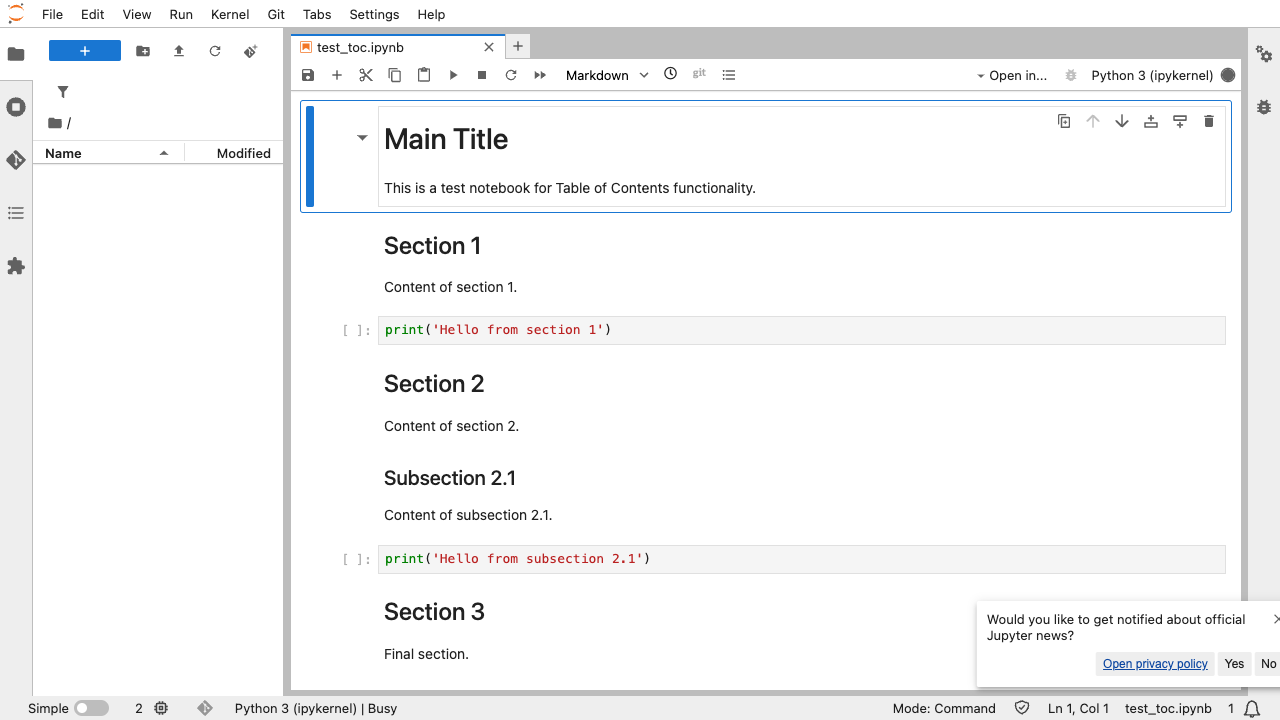

In [15]:
lab_page = None

async def _step(page):
    await page.goto(jupyterlab_url)

    # Wait for JupyterLab to load
    await expect(page.locator('#jp-main-dock-panel')).to_be_visible(timeout=transition_timeout)

    # Ensure file browser is visible
    # If File Browser tab is not selected, click it
    filebrowser_tab = page.locator('[data-id="filebrowser"]')
    if await filebrowser_tab.get_attribute('aria-selected') == 'false':
        await filebrowser_tab.click()
    
    # Wait for file browser to be visible
    await expect(page.locator('.jp-DirListing')).to_be_visible(timeout=transition_timeout)

    global lab_page
    lab_page = page

await run_pw(_step)

## Open test notebook

Start epoch: 1763093435.413651 seconds
test_toc.ipynb opened successfully


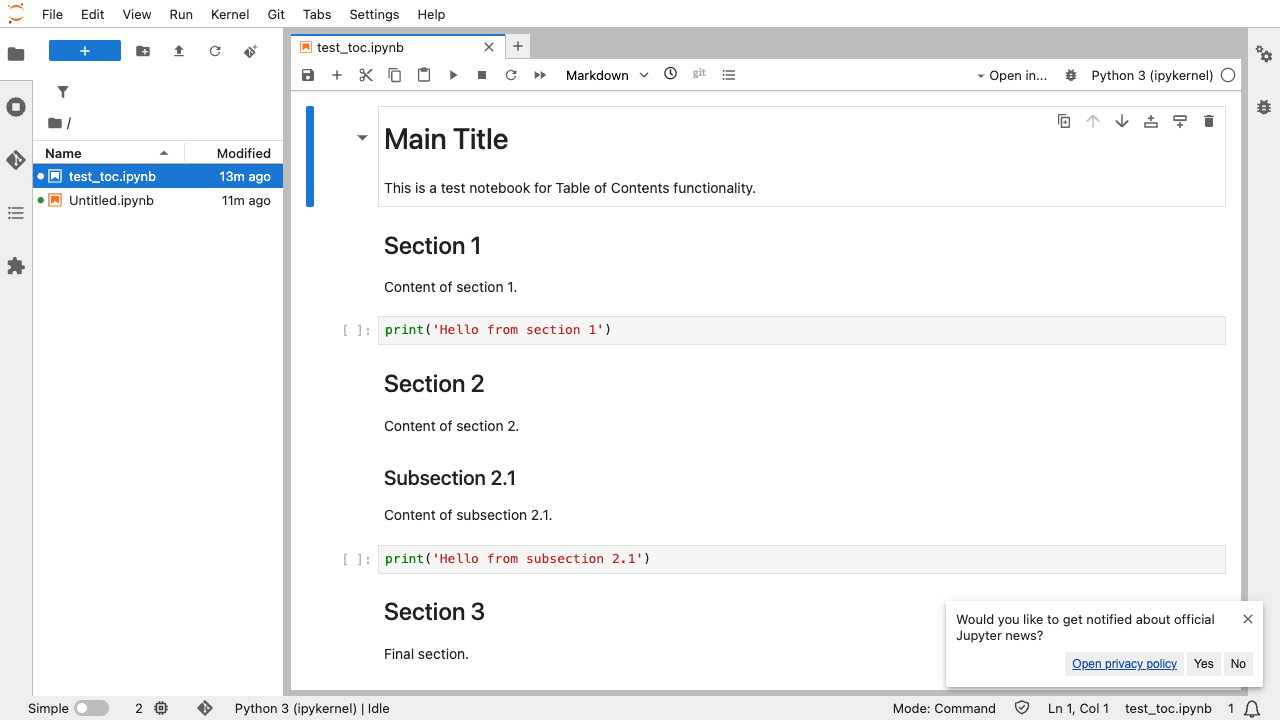

In [16]:
async def _step(page):
    # Double-click on test_toc.ipynb to open it
    notebook_item = jupyterlab.get_file_browser_item_locator(page, 'test_toc.ipynb')
    await expect(notebook_item).to_be_visible(timeout=transition_timeout)
    await notebook_item.dblclick()
    
    # Wait for notebook to open
    await asyncio.sleep(2)
    
    # Verify that notebook tab is visible
    notebook_tab = page.locator('//*[contains(@class, "lm-TabBar-tabLabel") and text()="test_toc.ipynb"]')
    await expect(notebook_tab).to_be_visible(timeout=transition_timeout)
    
    print("test_toc.ipynb opened successfully")

await run_pw(_step)

## Verify ToC button exists and click it

Start epoch: 1763093438.716047 seconds
ToC button is visible
ToC panel is visible after clicking button


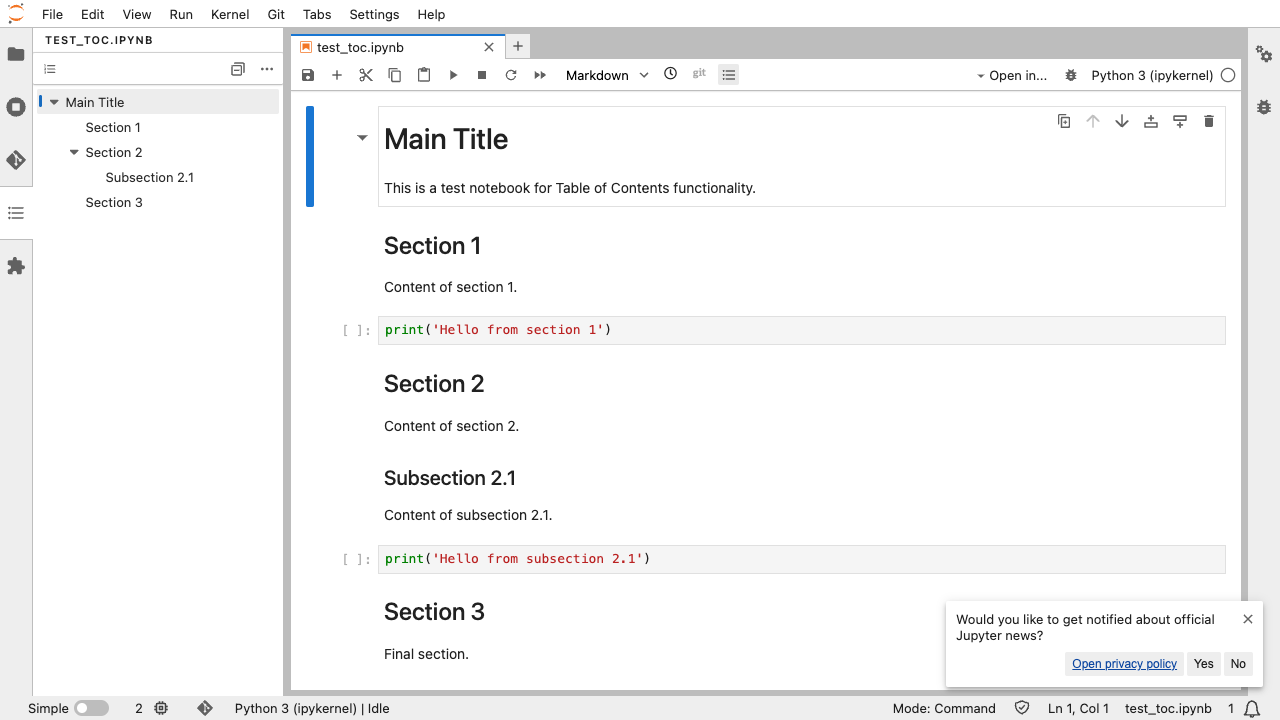

In [17]:
async def _step(page):
    # Find ToC button
    toc_button = page.locator('[data-command="table_of_contents:table-of-contents"]')
    await expect(toc_button).to_be_visible(timeout=transition_timeout)
    
    print("ToC button is visible")
    
    # Click ToC button
    await toc_button.click()
    await asyncio.sleep(1)
    
    # Verify that ToC panel is now visible
    toc_panel = page.locator('#table-of-contents')
    await expect(toc_panel).to_be_visible(timeout=transition_timeout)
    
    print("ToC panel is visible after clicking button")

await run_pw(_step)

## Clean up

In [18]:
await finish_pw_context()

Video: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpwjjtswuu/video-1.webm
HAR: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpwjjtswuu/har.zip
Console log: /var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmpwjjtswuu/console.log


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/Users/yazawa/workspace/nii-cloud/Jupyter-LC_ToC_button/ui-tests/e2e-notebook/notebooks/scripts/playwright.py", line 254, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/Users/yazawa/.pyenv/versions/3.11.5/lib/python3.11/shutil.py", line 256, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/var/folders/m0/myy2ys0s3cl_73__2gw8fw140000gn/T/tmp2whwwc0g/videos/81edb4ec0d479147bef638f6b78caf0f.webm'


In [19]:
!rm -fr {work_dir}